# Predict whether a tumor is malignant or benign based on diagnostic measurements.







**SEA600 - Assignment 1: Milestone 1**

Project: Breast Cancer Diagnosis (Binary Classification) Group Members: [Insert Names]

**1. Problem Definition**
The objective of this project is to develop a machine learning model to predict whether a breast mass is Malignant (Cancerous) or Benign (Non-Cancerous) based on 30 features computed from a digitized image of a fine needle aspirate (FNA).

**Type**: Supervised Binary Classification. Critical Constraint: In medical diagnosis, Recall (Sensitivity) is the priority. A False Negative (classifying cancer as benign) is life-threatening, whereas a False Positive (classifying benign as cancer) leads to further testing but not immediate harm.

**2. Data Loading & Cleaning**

We utilize the Breast Cancer Wisconsin (Diagnostic) Data Set. We drop the id column as it provides no predictive value, and remove the artifact column Unnamed: 32 often created by CSV trailing commas. The target variable diagnosis is encoded as 1 (Malignant) and 0 (Benign).

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.columns.tolist()

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

3. Exploratory Data Analysis (EDA)
**bold text**
We analyze the distribution of our features to determine preprocessing requirements.

Observation:
 As seen in the histograms below, features vary vastly in scale (e.g., area_mean > 1000, while smoothness_mean < 0.1). Most features are right-skewed. This confirms that Feature Scaling (Standardization) is mandatory for distance-based algorithms like KNN and gradient-based algorithms like Logistic Regression.

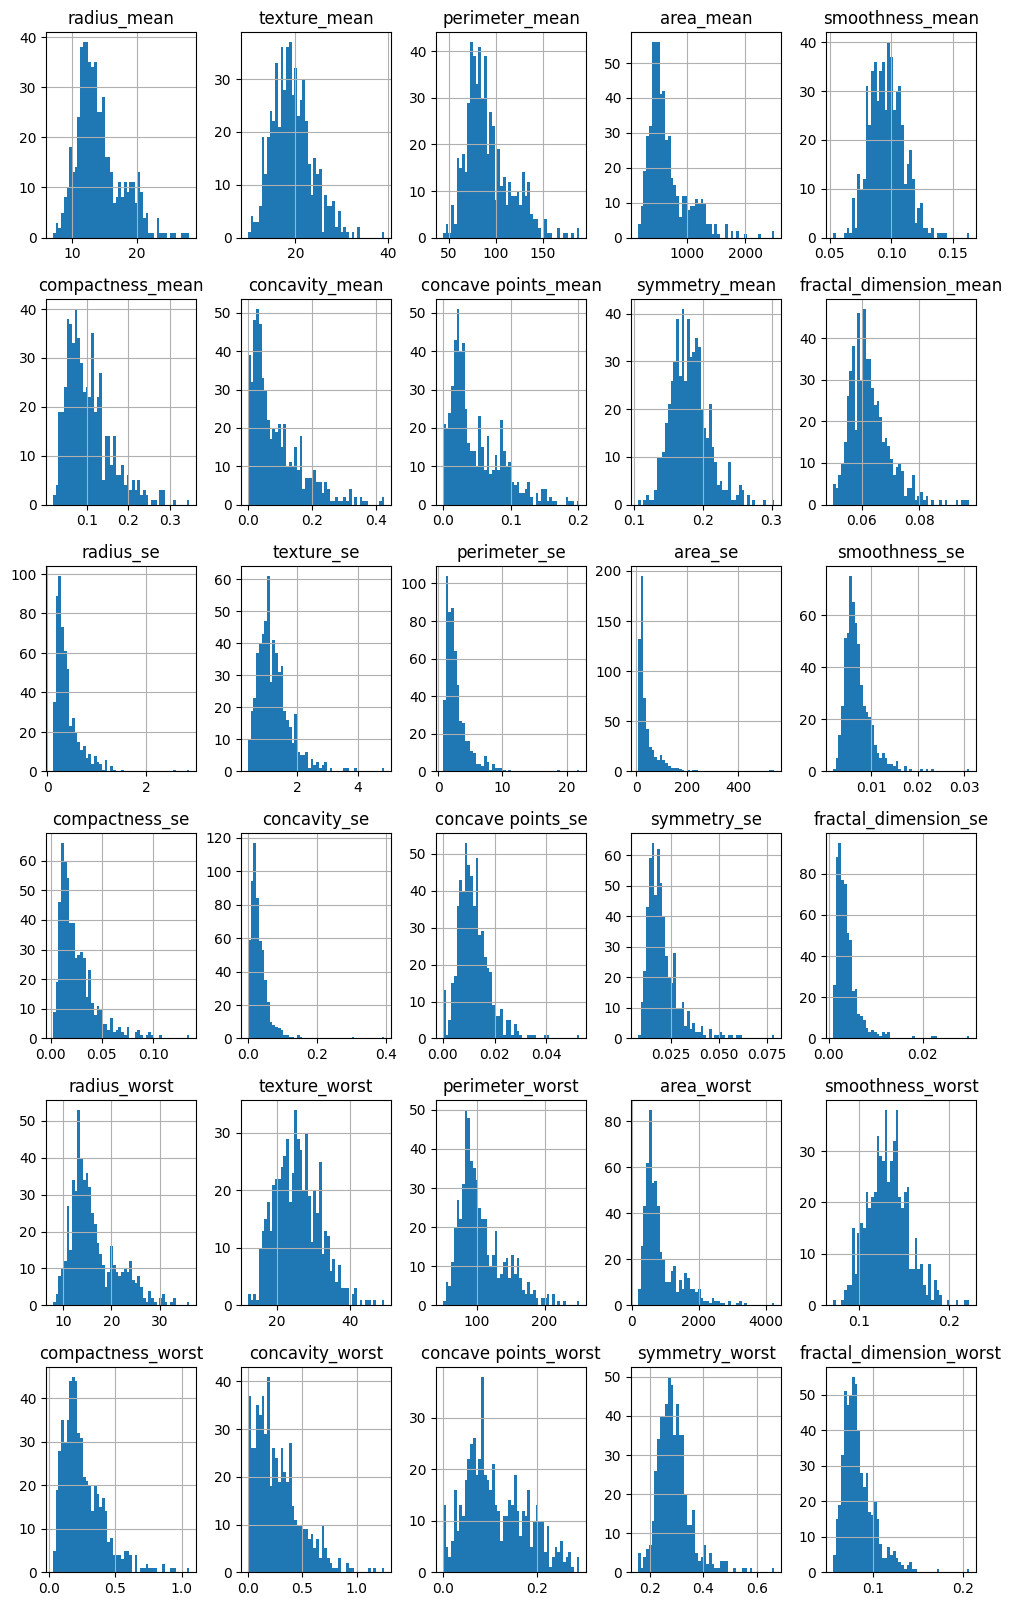

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 20))
plt.show() # mostly right skewed

In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


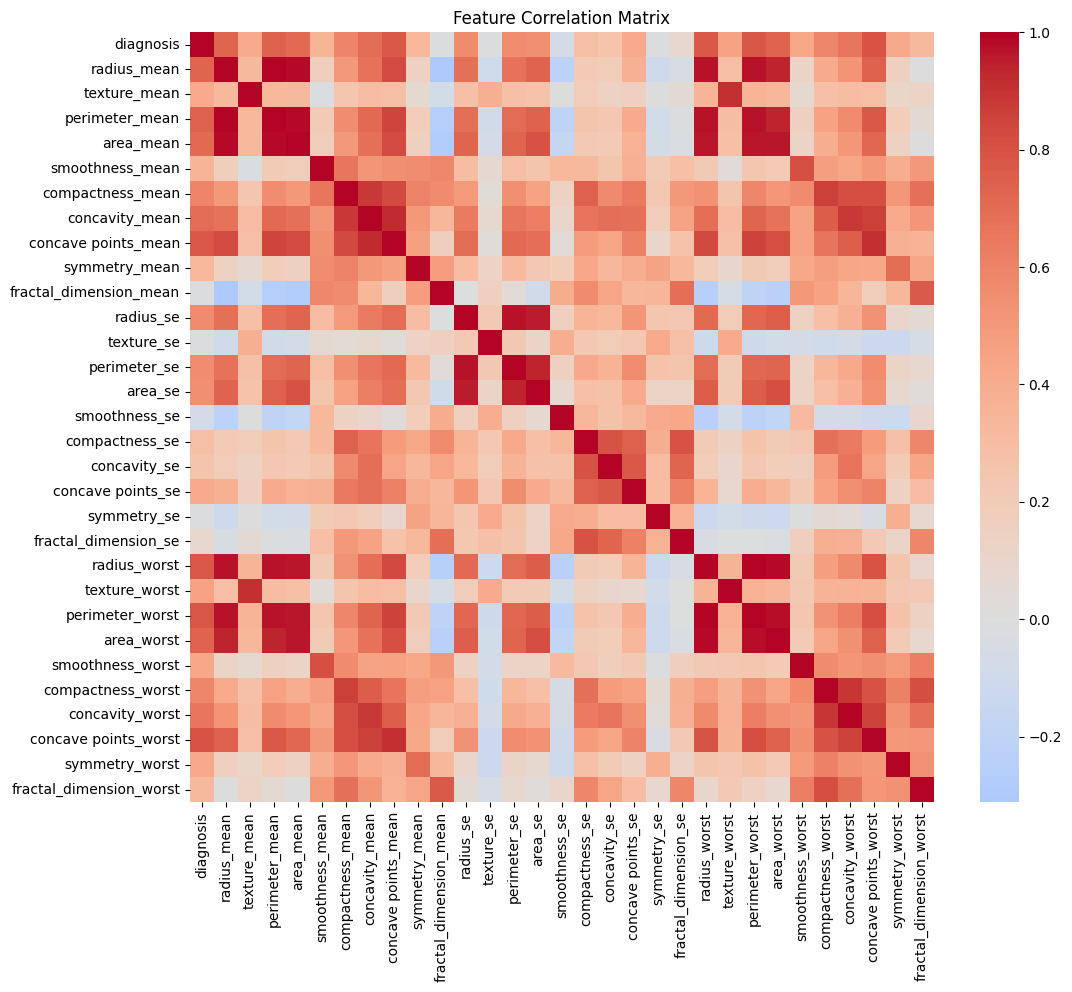

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()


# STEP 4

Class Balance Check:
We check the proportion of Benign vs. Malignant samples. While the dataset is not severely imbalanced, there are more Benign cases. We will use Stratified Splitting to ensure this ratio is preserved in our training and test sets.

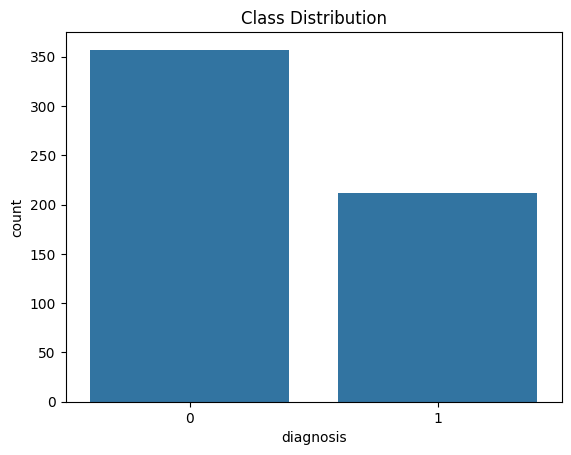

In [ ]:
import seaborn as sns

# checking class balance

sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution")
plt.show()

In [ ]:
# taking all features as input variables except diagnosis
X = df.drop('diagnosis',axis=1)

y= df['diagnosis'] # target value

**4. Data Splitting**

We split the data into Training (80%) and Testing (20%) sets.

Stratify=y:
Ensures the cancer prevalence rate is identical in both sets.

The Test Set Lock: Per assignment instructions, the Test Set (X_test) is set aside and will not be used for model training or tuning in this Milestone.

In [ ]:
# using stratified splitting to mantain class balance

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (455, 30)
Test shape: (114, 30)


In [ ]:
from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


The dataset was split into an 80% training set and a 20% test set using stratified sampling. The test set was held out until final evaluation. Model validation during development was performed using 5-fold cross-validation on the training data, which served as the validation process and helped reduce overfitting.

# 5. Baseline Method Selection

We select two simple classifiers as baselines to establish a performance benchmark:

Logistic Regression: A parametric, linear model. It serves as a strong baseline to check if the data is linearly separable. We use penalty=None to keep it un-regularized for this milestone.

K-Nearest Neighbors (KNN): A non-parametric, distance-based model. It assumes similar cases exist in close proximity.

We use 5-Fold Stratified Cross-Validation to evaluate these models robustly without touching the test set.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
)
])

scoring = ['accuracy', 'precision', 'recall', 'roc_auc','f1']

logistic_results = cross_validate(
    logistic_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=True
)

print("Logistic Regression Results")
print("CV Accuracy:", logistic_results['test_accuracy'].mean())
print("CV Precision:", logistic_results['test_precision'].mean())
print("CV Recall:", logistic_results['test_recall'].mean())
print("CV ROC-AUC:", logistic_results['test_roc_auc'].mean())
print("CV F1_SCORE:", logistic_results['test_f1'].mean())
print("Fit Time:", logistic_results['fit_time'].mean())
print("Score Time:", logistic_results['score_time'].mean())

Logistic Regression Results
CV Accuracy: 0.9604395604395604
CV Precision: 0.9485119047619047
CV Recall: 0.9470588235294117
CV ROC-AUC: 0.9932920536635708
CV F1_SCORE: 0.9472012045925089
Fit Time: 0.015378952026367188
Score Time: 0.020505762100219725


**Note on KNN Evaluation:** Below we apply the same evaluation pipeline to the K-Nearest Neighbors model.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

knn_results = cross_validate(
    knn_pipeline,
    X_train,
    y_train,
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=True
)

print("\nKNN Results")
print("CV Accuracy:", knn_results['test_accuracy'].mean())
print("CV Precision:", knn_results['test_precision'].mean())
print("CV Recall:", knn_results['test_recall'].mean())
print("CV ROC-AUC:", knn_results['test_roc_auc'].mean())
print("CV F1_SCORE:", knn_results['test_f1'].mean())
print("Fit Time:", knn_results['fit_time'].mean())
print("Score Time:", knn_results['score_time'].mean())



KNN Results
CV Accuracy: 0.964835164835165
CV Precision: 0.9875
CV Recall: 0.9176470588235294
CV ROC-AUC: 0.9871001031991744
CV F1_SCORE: 0.9510417318999409
Fit Time: 0.004859399795532226
Score Time: 0.01891798973083496


# **6. Performance Evaluation (ROC & Confusion Matrix)**

Since accuracy can be misleading in medical datasets, we analyze the ROC Curve and Confusion Matrix using cross-validated predictions.

ROC Curve: We look for the model with the curve closest to the top-left corner (High True Positive Rate, Low False Positive Rate).

Confusion Matrix: We specifically inspect the False Negatives (Bottom-Left quadrant). This number represents missed cancer cases and must be minimized.

For this baseline comparison, predictions are generated using the default probability threshold of 0.5. However, in medical diagnosis, this threshold is not fixed. In later milestones, the decision threshold will be adjusted to prioritize Recall (Sensitivity) and reduce False Negatives, since missing a malignant case is more critical than producing a false alarm.

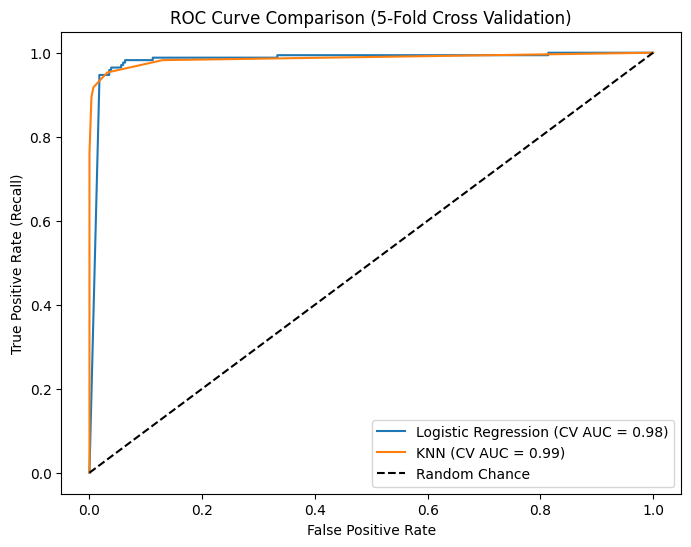

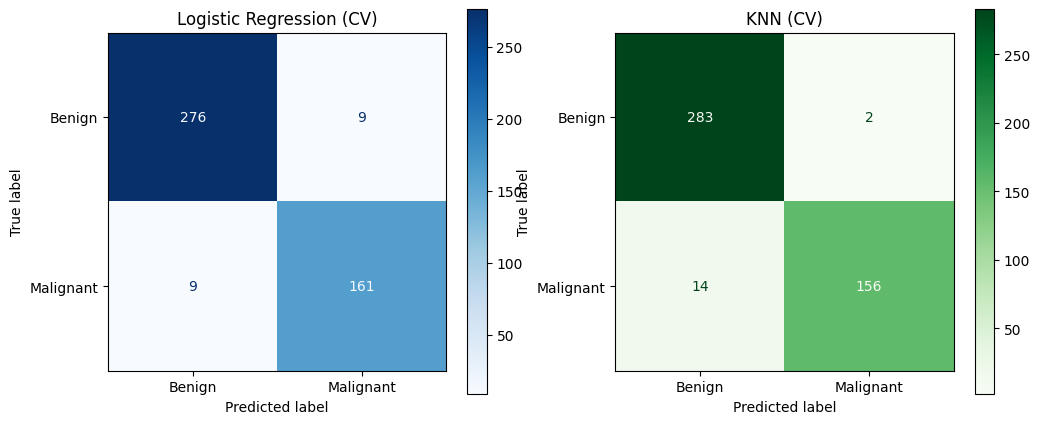

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# 1. Generate predictions using Cross Validation (Simulates testing on unseen data)
# We use method='predict_proba' to get probabilities for the ROC curve
log_cv_probs = cross_val_predict(logistic_pipeline, X_train, y_train, cv=cv_strategy, method='predict_proba')[:, 1]
knn_cv_probs = cross_val_predict(knn_pipeline, X_train, y_train, cv=cv_strategy, method='predict_proba')[:, 1]

# 2. Calculate ROC Curve metrics
fpr_log, tpr_log, _ = roc_curve(y_train, log_cv_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_train, knn_cv_probs)
auc_log = auc(fpr_log, tpr_log)
auc_knn = auc(fpr_knn, tpr_knn)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (CV AUC = {auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (CV AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve Comparison (5-Fold Cross Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.show()


log_cv_preds = (log_cv_probs > 0.5).astype(int)
knn_cv_preds = (knn_cv_probs > 0.5).astype(int)

labels = ['Benign', 'Malignant']  # 0 = Benign, 1 = Malignant

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(
    confusion_matrix(y_train, log_cv_preds),
    display_labels=labels
).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Logistic Regression (CV)")

ConfusionMatrixDisplay(
    confusion_matrix(y_train, knn_cv_preds),
    display_labels=labels
).plot(ax=ax[1], cmap='Greens')
ax[1].set_title("KNN (CV)")

plt.show()

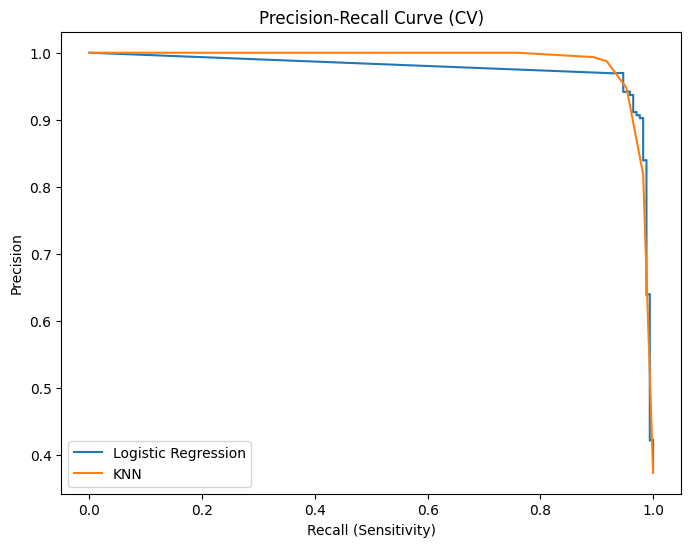

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall Data
precision_log, recall_log, _ = precision_recall_curve(y_train, log_cv_probs)
precision_knn, recall_knn, _ = precision_recall_curve(y_train, knn_cv_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label='Logistic Regression')
plt.plot(recall_knn, precision_knn, label='KNN')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (CV)')
plt.legend()
plt.show()


The PR curve shows that as we try to increase Recall (find more cancers), our Precision drops. Logistic Regression maintains higher Precision for the same level of Recall compared to KNN.

# STEP 7. Resource Utilization Analysis
We measure the computational cost of each model.

Training Time: How long it takes to fit the data.

Inference Speed: How long it takes to predict a single sample.

Memory Footprint: The size of the serialized model.

Note: We use the Test Set here strictly to measure inference speed (latency) on unseen data. No model tuning is performed based on these results.

In [ ]:


import time
import numpy as np

logistic_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)


def measure_time(func, runs=10):
    times = []
    for _ in range(runs):
        start = time.time()
        func()
        times.append(time.time() - start)
    return sum(times)/len(times)

log_train_time = measure_time(lambda: logistic_pipeline.fit(X_train, y_train))
log_pred_time = measure_time(lambda: logistic_pipeline.predict(X_test))

knn_train_time = measure_time(lambda: knn_pipeline.fit(X_train, y_train))
knn_pred_time = measure_time(lambda: knn_pipeline.predict(X_test))


print("=== SPEED COMPARISON ===")
print("Logistic Train Time:", log_train_time)
print("Logistic Predict Time:", log_pred_time/len(X_test), "per sample")
print("KNN Train Time:", knn_train_time)
print("KNN Predict Time:", knn_pred_time/len(X_test), "per sample")




=== SPEED COMPARISON ===
Logistic Train Time: 0.013742852210998534
Logistic Predict Time: 1.7683129561574837e-05 per sample
KNN Train Time: 0.004793596267700195
KNN Predict Time: 4.0697633174427765e-05 per sample


In [ ]:
import joblib, os

joblib.dump(logistic_pipeline, 'log_model.pkl')
joblib.dump(knn_pipeline, 'knn_model.pkl')

log_size = os.path.getsize('log_model.pkl')/1024
knn_size = os.path.getsize('knn_model.pkl')/1024

print("\n=== MEMORY USAGE ===")
print("Logistic model size: %.2f KB" % log_size)
print("KNN model size: %.2f KB" % knn_size)


=== MEMORY USAGE ===
Logistic model size: 2.97 KB
KNN model size: 112.89 KB


8. Milestone 1 Conclusion
Based on the analysis above:

Resources: KNN has a faster training time (zero cost) but slower inference time and larger memory usage (lazy learning), whereas Logistic Regression takes longer to train but is extremely fast and lightweight during inference.

Next Steps: In Milestone 2, we will explore advanced models to improve Recall and reduce False Negatives.